In [81]:
import pandas as pd

In [82]:
ds=pd.read_csv(r"C:\Users\Admin\Downloads\ipl_win_probability_dataset_with_categorical.csv")
ds.head()

,team1_strength,team2_strength,team1_recent_form,team2_recent_form,team1_home,toss_win,batting_first,avg_team1_score,avg_team2_score,team1_win_pct,team2_win_pct,pitch_type,venue_city,weather,pressure_match,team1_win
0,98,68,0,2,1,0,1,186,161,57.816154,46.909440,Batting,Delhi,Clear,0,1
1,88,67,0,0,1,0,0,183,179,45.644408,47.591266,Batting,Pune,Clear,1,1
2,74,92,4,0,0,0,1,180,162,66.640265,68.194546,Batting,Delhi,Humid,0,1
3,67,65,4,4,1,0,1,171,198,64.251473,51.877335,Batting,Pune,Clear,1,1
4,80,98,4,3,1,0,1,165,188,55.615813,61.550450,Bowling,Pune,Clear,1,0


In [83]:
ds.shape

(2000, 16)

In [84]:
ds.isnull()

,team1_strength,team2_strength,team1_recent_form,team2_recent_form,team1_home,toss_win,batting_first,avg_team1_score,avg_team2_score,team1_win_pct,team2_win_pct,pitch_type,venue_city,weather,pressure_match,team1_win
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [85]:
ds.isnull().sum()

team1_strength       0
team2_strength       0
team1_recent_form    0
team2_recent_form    0
team1_home           0
toss_win             0
batting_first        0
avg_team1_score      0
avg_team2_score      0
team1_win_pct        0
team2_win_pct        0
pitch_type           0
venue_city           0
weather              0
pressure_match       0
team1_win            0
dtype: int64

In [86]:
ds.dropna(inplace=True)

In [87]:
ds['team1_win'].value_counts()

team1_win
1    1117
0     883
Name: count, dtype: int64

In [88]:
ds.columns.tolist()

['team1_strength',
 'team2_strength',
 'team1_recent_form',
 'team2_recent_form',
 'team1_home',
 'toss_win',
 'batting_first',
 'avg_team1_score',
 'avg_team2_score',
 'team1_win_pct',
 'team2_win_pct',
 'pitch_type',
 'venue_city',
 'weather',
 'pressure_match',
 'team1_win']

In [89]:
ds.isna().sum()

team1_strength       0
team2_strength       0
team1_recent_form    0
team2_recent_form    0
team1_home           0
toss_win             0
batting_first        0
avg_team1_score      0
avg_team2_score      0
team1_win_pct        0
team2_win_pct        0
pitch_type           0
venue_city           0
weather              0
pressure_match       0
team1_win            0
dtype: int64

In [90]:
ds.dtypes

team1_strength         int64
team2_strength         int64
team1_recent_form      int64
team2_recent_form      int64
team1_home             int64
toss_win               int64
batting_first          int64
avg_team1_score        int64
avg_team2_score        int64
team1_win_pct        float64
team2_win_pct        float64
pitch_type            object
venue_city            object
weather               object
pressure_match         int64
team1_win              int64
dtype: object

In [91]:
categorical_cols = ds.select_dtypes(include=['object']).columns
print("categorical_cols=",categorical_cols)

categorical_cols= Index(['pitch_type', 'venue_city', 'weather'], dtype='object')


In [92]:
# Encode categorical columns

from sklearn.preprocessing import LabelEncoder
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    ds[col] = le.fit_transform(ds[col])
    le_dict[col] = le

In [93]:
for col in categorical_cols:
    le = le_dict[col]
    print(f"\nColumn: {col}")
    for i, class_ in enumerate(le.classes_):
        print(f"  {class_} --> {i}")


Column: pitch_type
  Batting --> 0
  Bowling --> 1

Column: venue_city
  Delhi --> 0
  Mumbai --> 1
  Pune --> 2

Column: weather
  Clear --> 0
  Humid --> 1


In [94]:
num_cols = ds.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

Index(['team1_strength', 'team2_strength', 'team1_recent_form',
       'team2_recent_form', 'team1_home', 'toss_win', 'batting_first',
       'avg_team1_score', 'avg_team2_score', 'team1_win_pct', 'team2_win_pct',
       'pitch_type', 'venue_city', 'weather', 'pressure_match', 'team1_win'],
      dtype='object')


In [95]:
ds.nunique().to_frame("No. of unique values")

,No. of unique values
team1_strength,40
team2_strength,40
team1_recent_form,5
team2_recent_form,5
team1_home,2
toss_win,2
batting_first,2
avg_team1_score,60
avg_team2_score,60
team1_win_pct,2000


In [50]:
ds.describe()

,team1_strength,team2_strength,team1_recent_form,team2_recent_form,team1_home,toss_win,batting_first,avg_team1_score,avg_team2_score,team1_win_pct,team2_win_pct,pitch_type,venue_city,weather,pressure_match,team1_win
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,79.897500,79.557500,2.027000,1.989000,0.491500,0.479000,0.504500,169.676500,169.28150,55.184863,55.045727,0.517000,1.026500,0.482500,0.492000,0.55850
std,11.610056,11.494118,1.410413,1.408855,0.500053,0.499684,0.500105,17.267221,17.31806,8.626566,8.625291,0.499836,0.823491,0.499819,0.500061,0.49669
min,60.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,140.000000,140.00000,40.003559,40.007220,0.000000,0.000000,0.000000,0.000000,0.00000
25%,70.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,155.000000,154.00000,47.724806,47.559048,0.000000,0.000000,0.000000,0.000000,0.00000
50%,80.500000,80.000000,2.000000,2.000000,0.000000,0.000000,1.000000,169.000000,169.00000,55.504796,54.948046,1.000000,1.000000,0.000000,0.000000,1.00000
75%,90.000000,89.000000,3.000000,3.000000,1.000000,1.000000,1.000000,185.000000,185.00000,62.584816,62.412357,1.000000,2.000000,1.000000,1.000000,1.00000
max,99.000000,99.000000,4.000000,4.000000,1.000000,1.000000,1.000000,199.000000,199.00000,69.990089,69.996780,1.000000,2.000000,1.000000,1.000000,1.00000


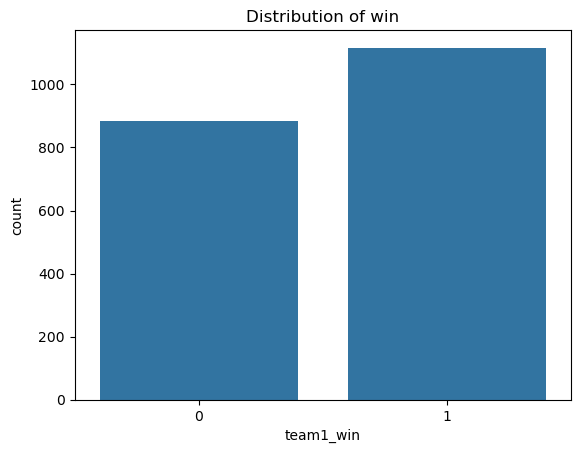

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='team1_win', data=ds)
#sns.countplot(x='Attrition', data=ds, palette={0: "red", 1: "green"})
plt.title('Distribution of win')
plt.show()

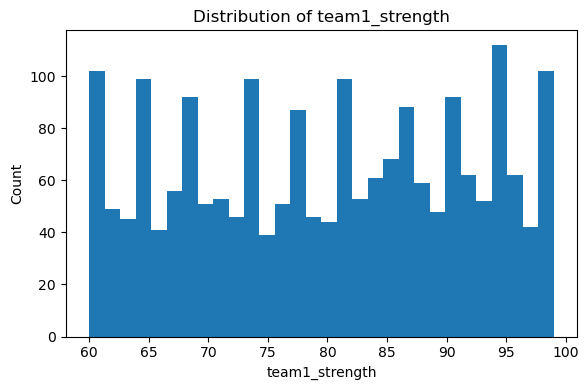

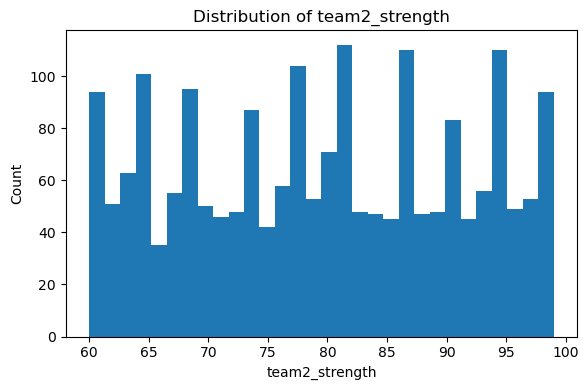

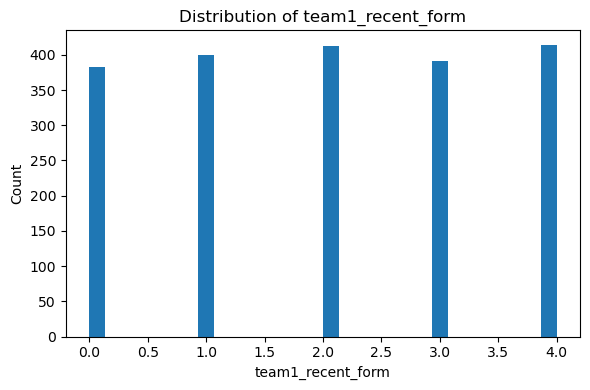

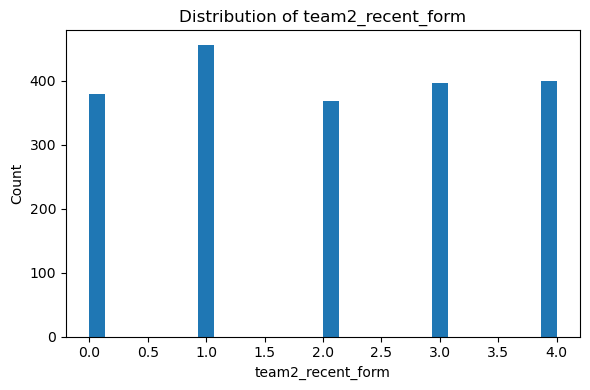

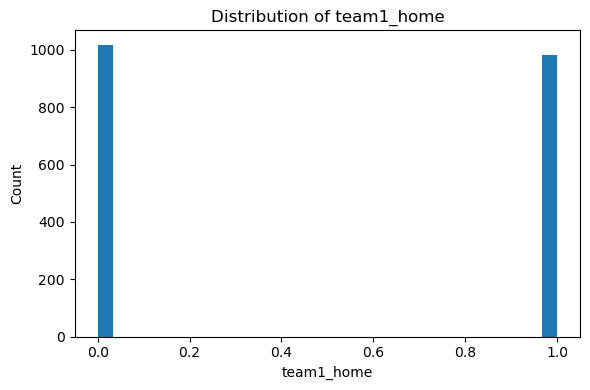

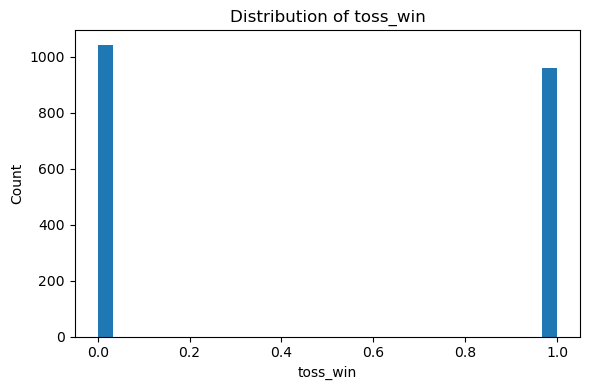

In [96]:
for col in num_cols[:6]:
    plt.figure(figsize=(6, 4))
    plt.hist(ds[col].dropna(), bins=30)  # histogram
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

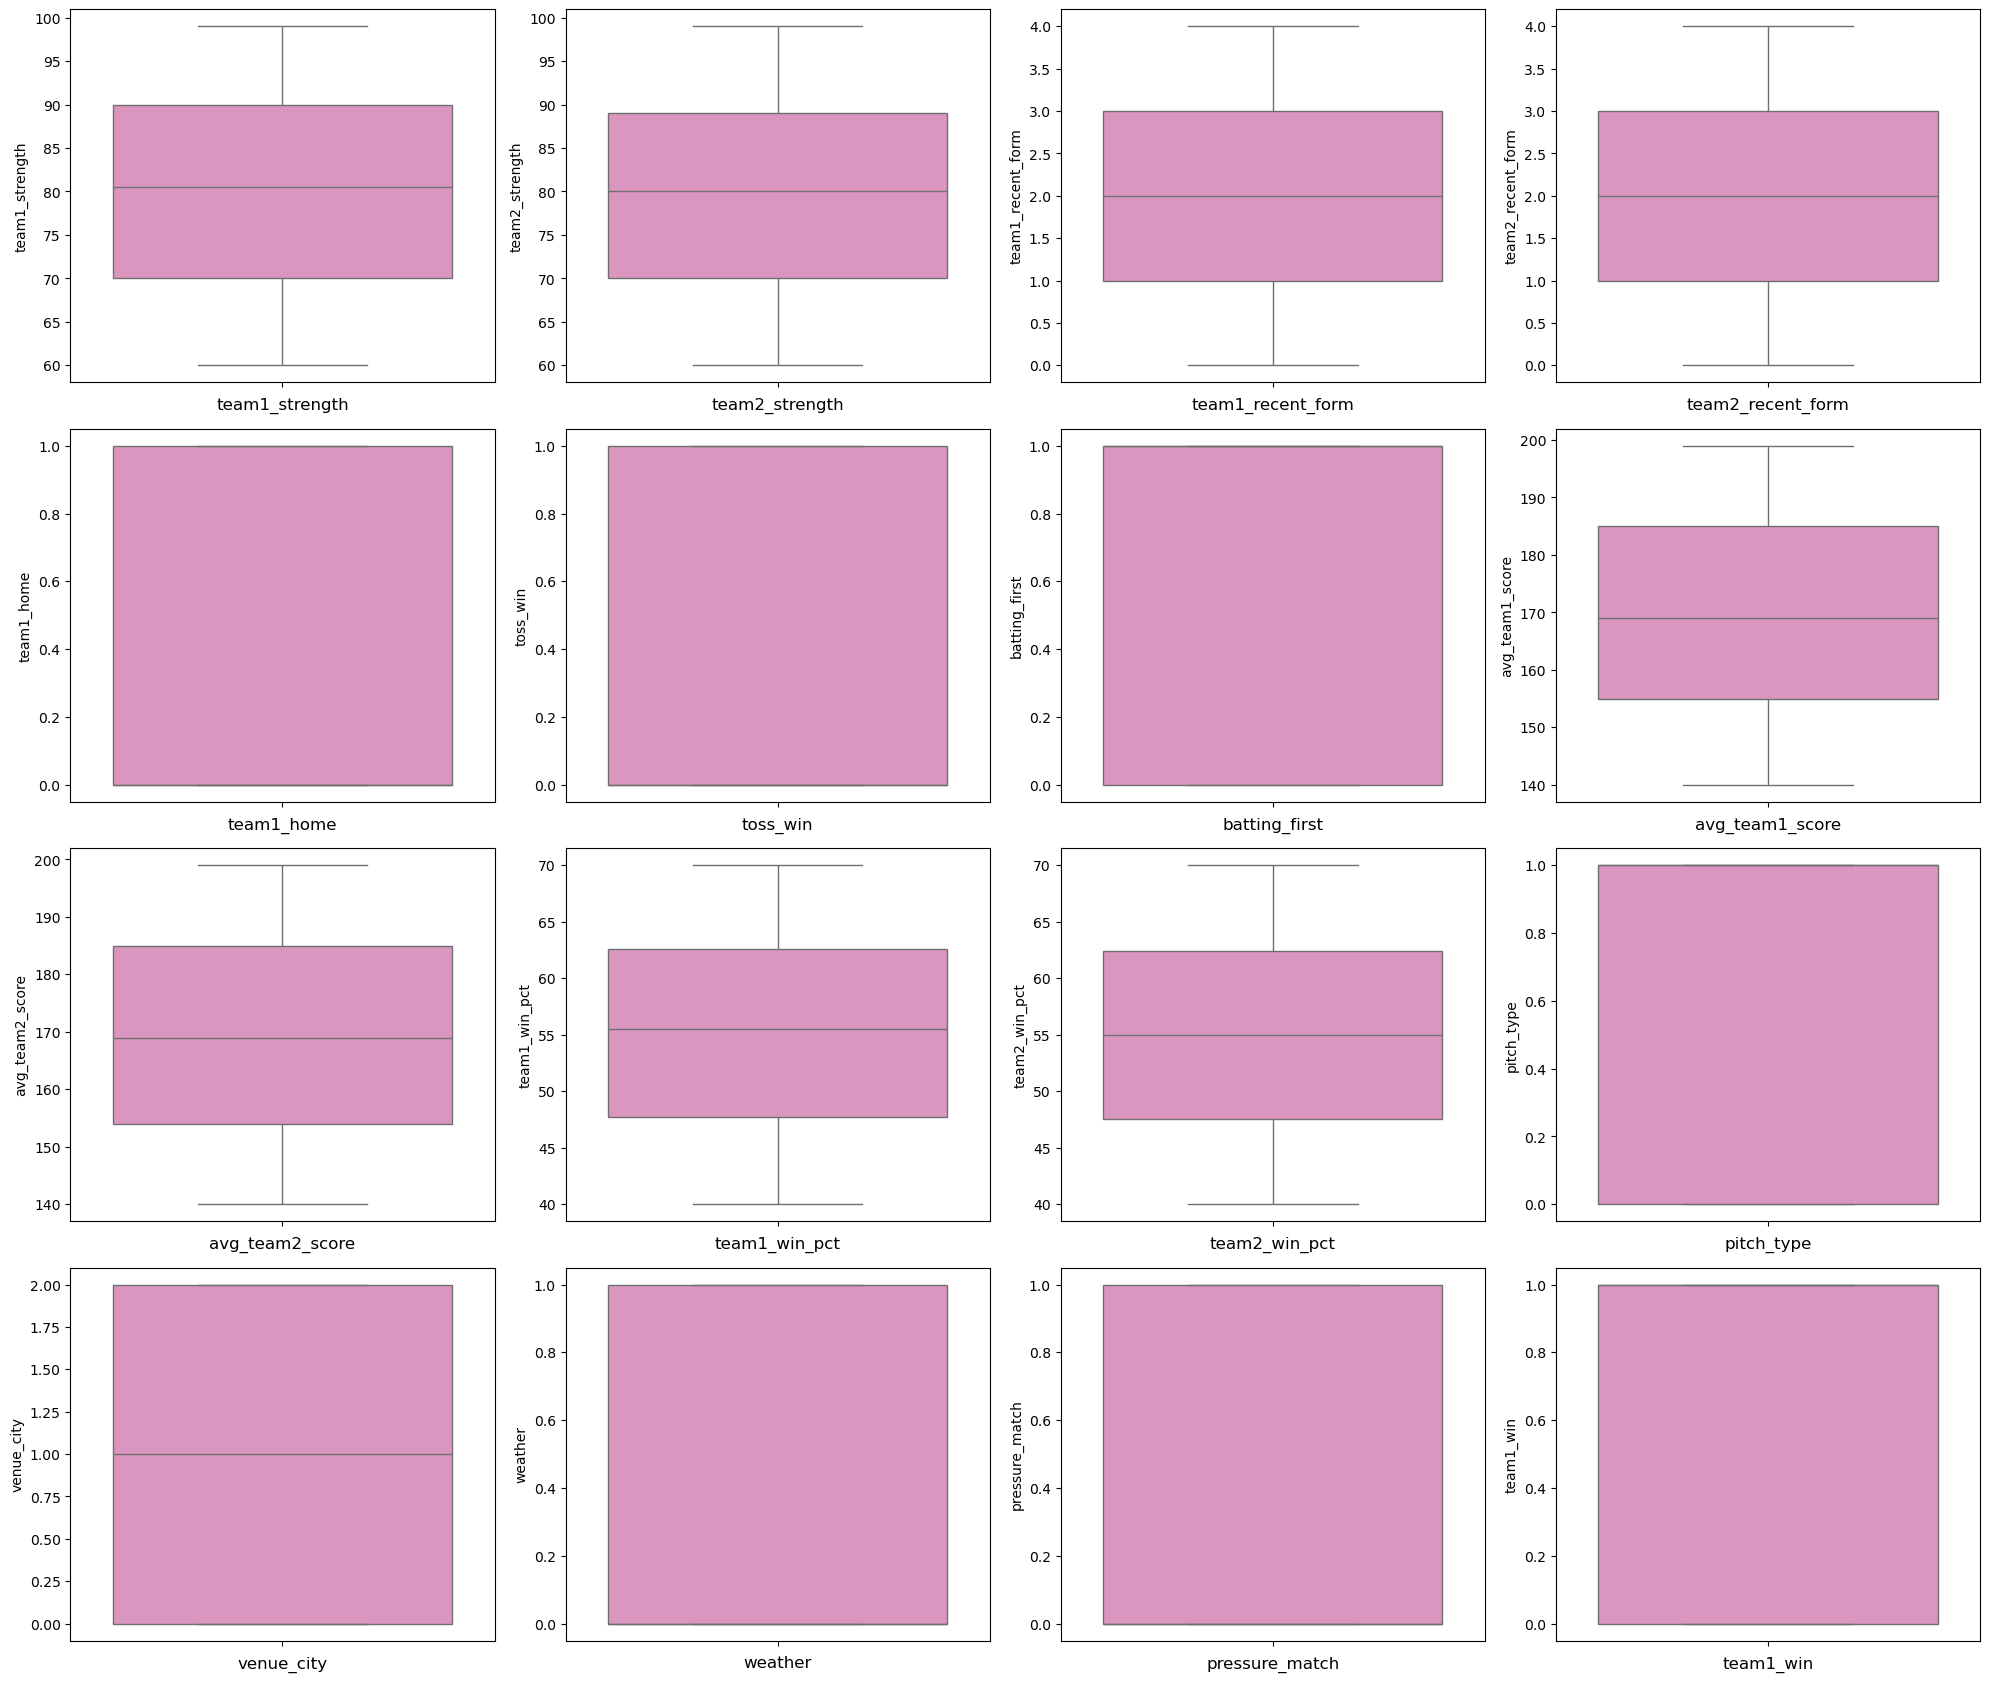

In [97]:
# Outliers
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in ds:
    if plotnumber<=18:
        ax = plt.subplot(6,4, plotnumber)
        sns.boxplot(ds[column], palette = 'Set2_r')
        plt.xlabel(column, fontsize = 12)
        plt.yticks(rotation = 0, fontsize= 10)
    plotnumber +=1
plt.tight_layout()

In [98]:
outlier_info = {}

for col in ds.select_dtypes(include=['int64','float64']).columns:
    Q1 = ds[col].quantile(0.25)
    Q3 = ds[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # count outliers
    outliers = ds[(ds[col] < lower_limit) | (ds[col] > upper_limit)][col]
    
    outlier_count = outliers.count()
    total_count = ds[col].count()
    percentage = (outlier_count / total_count) * 100
    
    outlier_info[col] = [outlier_count, round(percentage, 2)]

# Convert to DataFrame
outlier_df = pd.DataFrame(outlier_info, index=['Outlier Count', 'Outlier %']).T
print(outlier_df)


                   Outlier Count  Outlier %
team1_strength               0.0        0.0
team2_strength               0.0        0.0
team1_recent_form            0.0        0.0
team2_recent_form            0.0        0.0
team1_home                   0.0        0.0
toss_win                     0.0        0.0
batting_first                0.0        0.0
avg_team1_score              0.0        0.0
avg_team2_score              0.0        0.0
team1_win_pct                0.0        0.0
team2_win_pct                0.0        0.0
pitch_type                   0.0        0.0
venue_city                   0.0        0.0
weather                      0.0        0.0
pressure_match               0.0        0.0
team1_win                    0.0        0.0


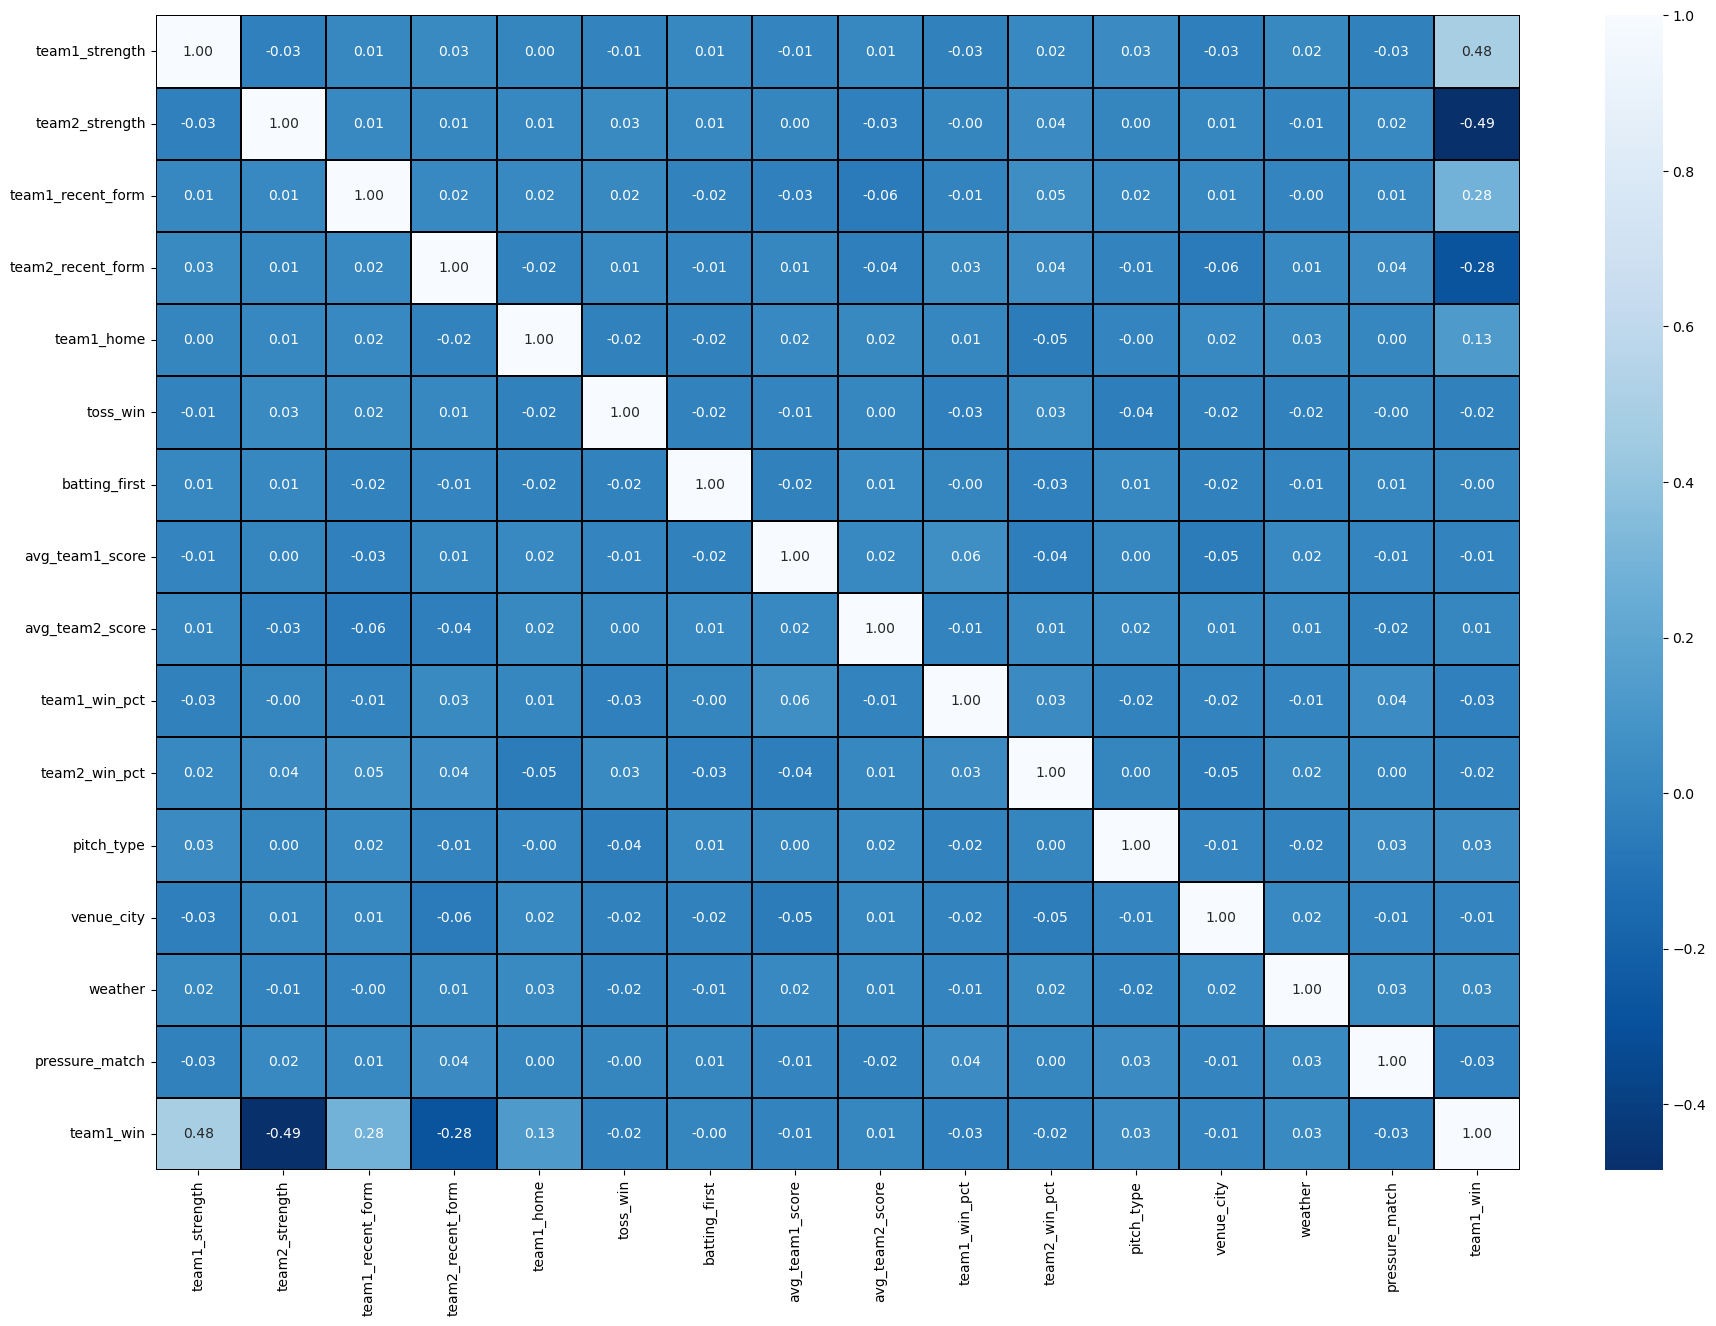

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 15))

# Select only numeric columns for correlation
numeric_df = ds.select_dtypes(include='number')

# Compute correlation
corr = numeric_df.corr()

# Draw heatmap
sns.heatmap(corr, 
            linewidths=0.1, 
            linecolor='black', 
            annot=True, 
            fmt=".2f",        # safer format (no error)
            cmap='Blues_r')

plt.yticks(rotation=0)
plt.show()

In [100]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [101]:
X = ds.drop('team1_win', axis=1)  
y = ds['team1_win']   

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=42)

In [103]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [105]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

log_acc = accuracy_score(y_test, log_pred)
print("Logistic Regression Accuracy:", log_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))

Logistic Regression Accuracy: 0.98875
Confusion Matrix:
 [[346   4]
 [  5 445]]


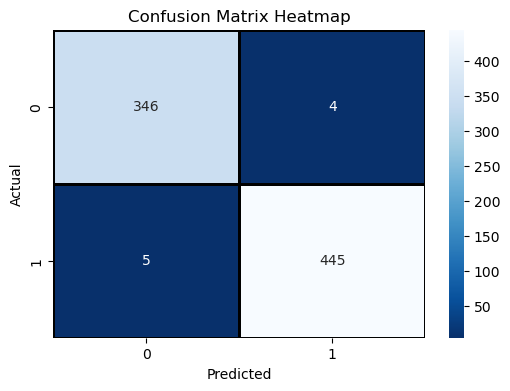

In [106]:
cm = confusion_matrix(y_test, log_pred)

# Step 2: Heatmap तयार करा
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r', linewidths=1, linecolor='black')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [107]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)


Decision Tree Accuracy: 0.875


In [108]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.9175


In [109]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))

SVM Accuracy: 0.9525
Confusion Matrix:
 [[330  20]
 [ 18 432]]


In [110]:
try:
    from xgboost import XGBClassifier
    
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    
    xgb_acc = accuracy_score(y_test, xgb_pred)
    print("XGBoost Accuracy:", xgb_acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))

except:
    print("XGBoost not installed")
    xgb_acc = 0


XGBoost Accuracy: 0.95125
Confusion Matrix:
 [[334  16]
 [ 23 427]]
